# Inspecting X_train data (Before PCA)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_theme(style="whitegrid")

In [22]:
# Load the data
X_train = pd.read_csv('../data/train_test/X_train.csv')
y_train = pd.read_csv('../data/train_test/y_train.csv')

print("X_train shape:", X_train.shape)
X_train.head()

X_train shape: (4668, 49)


,Frequency,TotalQuantity,MaxQuantity,CustomerTenureDays,FirstPurchaseDaysAgo,PreferredDayOfWeek,PreferredMonth,WeekendPurchaseRatio,AvgDaysBetweenPurchases,UniqueDescriptions,...,ProductDiversity_Modéré,ProductDiversity_Spécialisé,Gender_Unknown,AccountStatus_Closed,AccountStatus_Suspended,GeoIP,RegistrationMonth,RegistrationDay,RegistrationDayOfWeek,DaysSinceRegistration
0,-0.004098,-0.096217,-0.009669,0.610430,0.717759,3,-0.755125,-0.470800,0.434562,-0.468529,...,False,False,True,False,False,-0.943901,-0.785533,1.196002,0,1.509113
1,-0.340014,-0.214185,-0.063876,0.836060,0.743082,6,-1.906496,3.142896,0.134560,-0.192332,...,False,False,True,False,False,1.201208,0.336268,1.424862,5,0.773666
2,2.235337,3.999343,1.063062,1.716015,1.182017,1,0.971933,-0.470800,0.269665,-0.504555,...,True,False,False,False,False,0.056453,0.336268,-0.749309,0,0.886356
3,-0.116070,-0.160200,-0.009669,-0.653095,-1.130835,4,0.396247,-0.470800,0.069874,-0.648657,...,True,False,False,False,False,-1.104829,-1.626884,0.509421,3,-0.086331
4,-0.451986,-0.212186,-0.060310,-1.006582,-1.620417,6,0.971933,3.142896,-0.306782,0.059847,...,False,False,False,False,False,0.540452,1.177618,-0.177159,6,0.311047


In [23]:
X_train.columns

Index(['Frequency', 'TotalQuantity', 'MaxQuantity', 'CustomerTenureDays',
       'FirstPurchaseDaysAgo', 'PreferredDayOfWeek', 'PreferredMonth',
       'WeekendPurchaseRatio', 'AvgDaysBetweenPurchases', 'UniqueDescriptions',
       'UniqueCountries', 'NegativeQuantityCount', 'ZeroPriceCount',
       'ReturnRatio', 'AvgLinesPerInvoice', 'Age', 'SatisfactionScore',
       'RFMSegment', 'SpendingCategory', 'PreferredTimeOfDay',
       'ChurnRiskCategory', 'BasketSizeCategory', 'Country',
       'CustomerType_Nouveau', 'CustomerType_Occasionnel',
       'CustomerType_Régulier', 'FavoriteSeason_Hiver',
       'FavoriteSeason_Printemps', 'FavoriteSeason_Été',
       'Region_Amérique du Nord', 'Region_Amérique du Sud', 'Region_Asie',
       'Region_Autre', 'Region_Europe centrale', 'Region_Europe continentale',
       'Region_Europe de l'Est', 'Region_Europe du Nord',
       'Region_Moyen-Orient', 'WeekendPreference_Semaine',
       'ProductDiversity_Modéré', 'ProductDiversity_Spécialisé',
  

## Histogram of Age

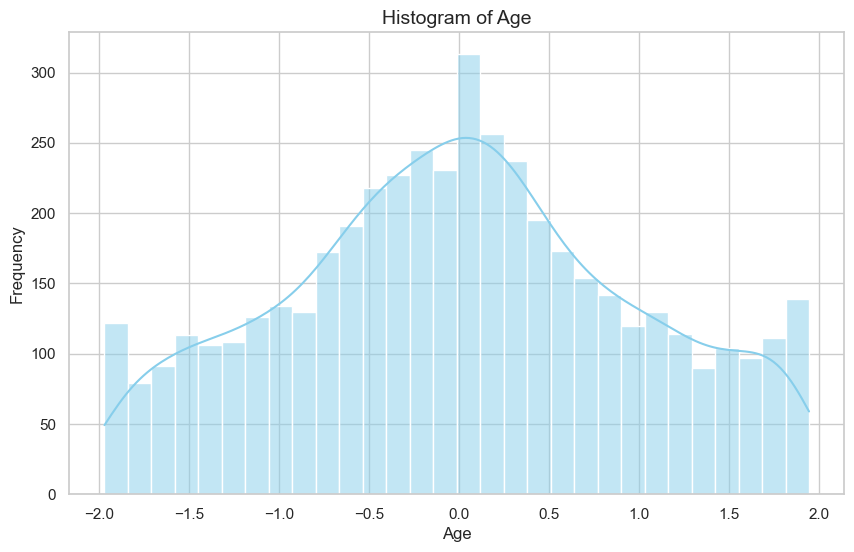

In [24]:
# We will look for an 'Age' column, or fallback to 'AgeCategory' depending on how the data was scaled/encoded.
age_col = 'Age' if 'Age' in X_train.columns else 'AgeCategory' if 'AgeCategory' in X_train.columns else None

if age_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[age_col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {age_col}', fontsize=14)
    plt.xlabel(age_col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
else:
    print("Age column not found. Available columns:", X_train.columns.tolist())

## Correlation Matrix

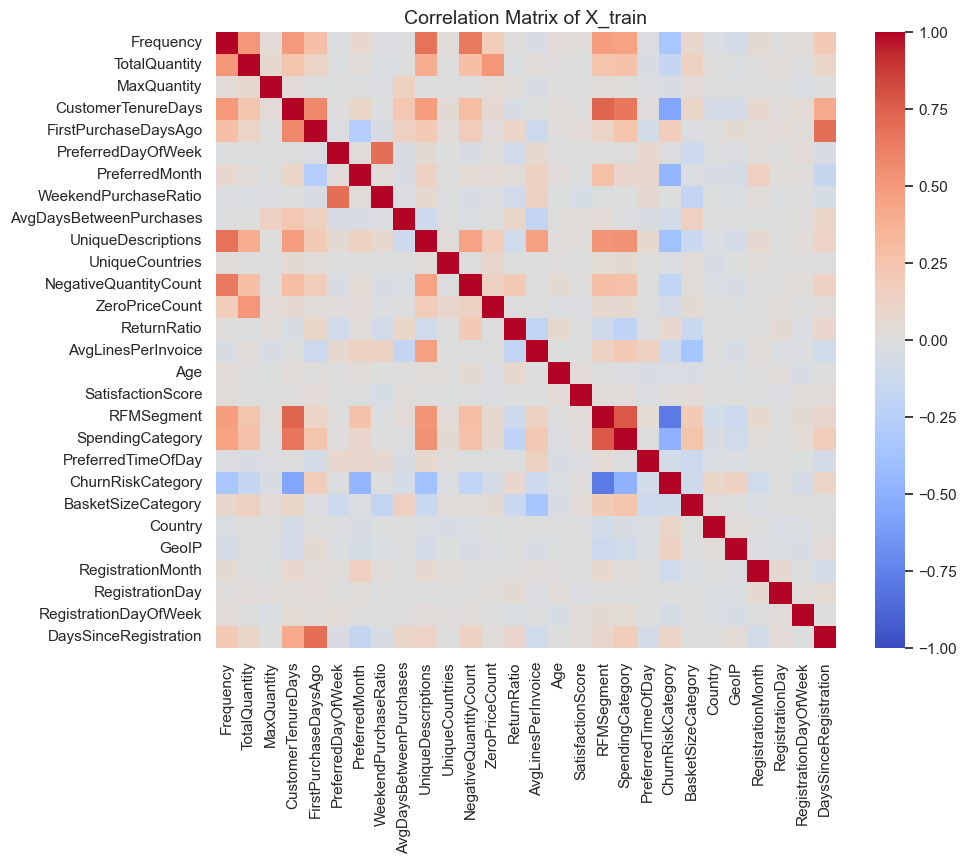

In [25]:
plt.figure(figsize=(10, 8))
corr = X_train.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of X_train', fontsize=14)
plt.show()

In [ ]:
Y_train = pd.read_csv('../data/train_test/y_train.csv')

In [32]:
y_train.head()

,Churn
0,1
1,0
2,0
3,0
4,0


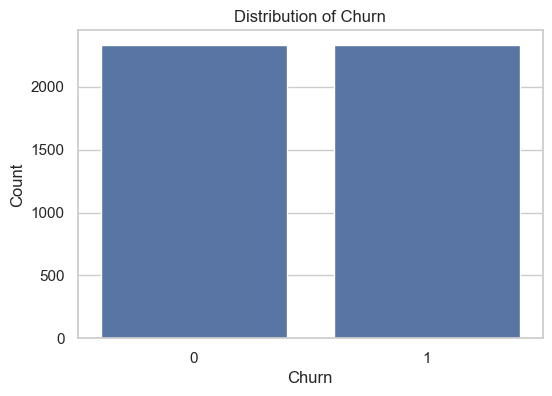

In [33]:
churn_counts = y_train["Churn"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()